## Analyse univariée

In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [219]:
#Modification des affichages de colonnes, lignes et largeurs de colonnes pour avoir un maximum d'information
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', None)

In [220]:
data_f = pd.read_csv('C:\\Users\\Nordine\\OneDrive\\Documents\\Projet3-Openclassrooms-master\\Projet3-Openclassrooms-master\\data_cleaned2.csv')
data_f.columns

Index(['code', 'product_name', 'brands', 'pnns_groups_1', 'energy-kcal_100g',
       'carbohydrates_100g', 'sugars_100g', 'fat_100g', 'proteins_100g',
       'salt_100g', 'nutrition-score-fr_100g'],
      dtype='object')

#### Variables numériques

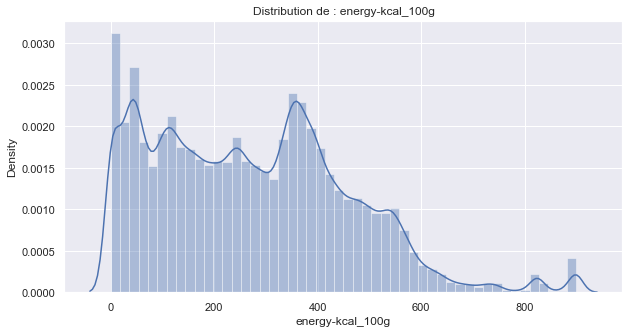

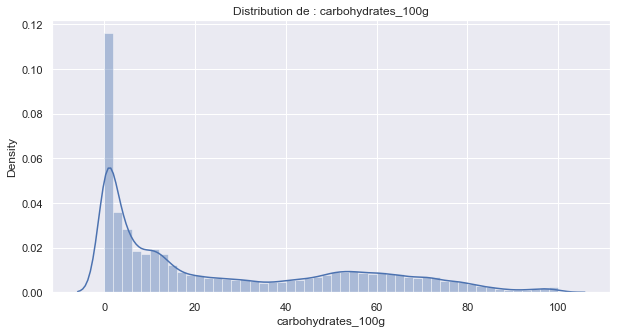

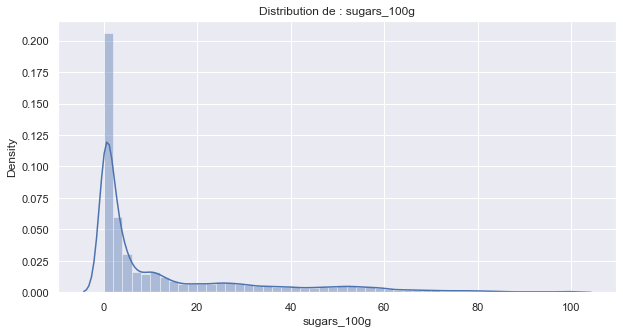

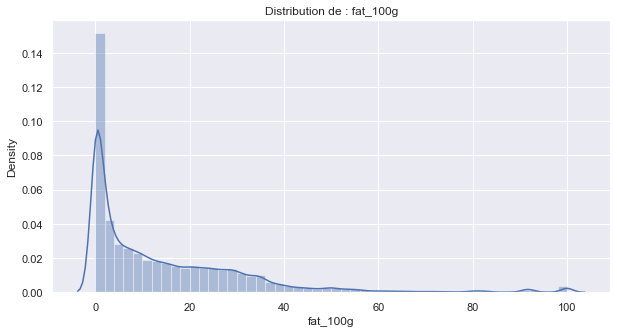

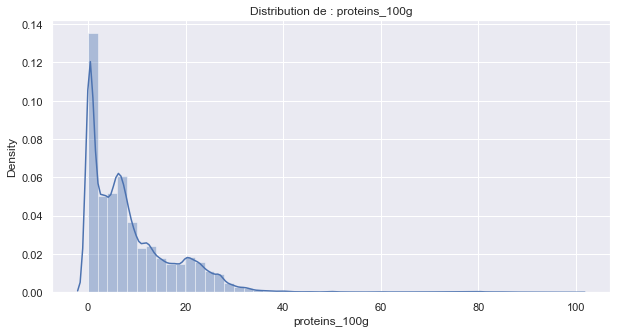

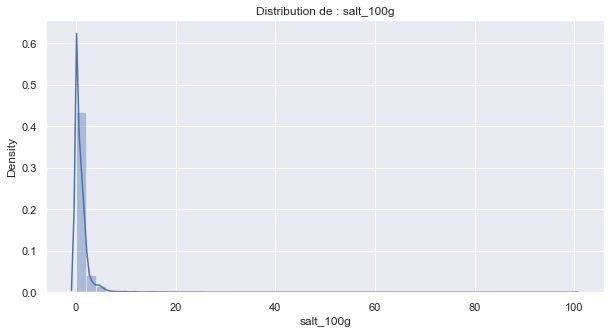

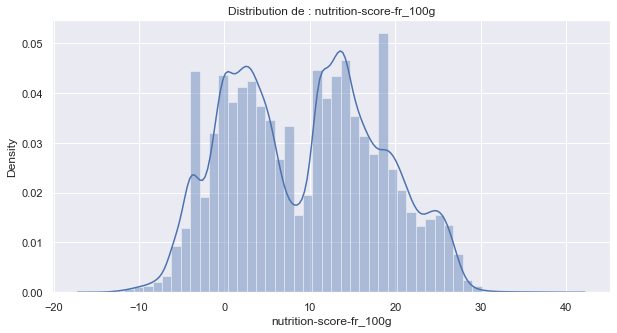

In [127]:
numeric_columns = data_f.select_dtypes(include = ['int32','float64']).columns
for column in numeric_columns:
    plt.figure(figsize = (10,5))
    sns.set(font_scale=1)
    sns.distplot(data_f[column], bins=50)
    titre = 'Distribution de : ' + column
    plt.title(titre)
    plt.xlabel(column)
    plt.show()

A part la colonne nutrition_score_fr_100g, toutes les distributions sont skewed à droite:

In [128]:
print('Skewness')
for column in numeric_columns:    
    print(f'{column:-<50}{data_f[column].skew()}')

Skewness
energy-kcal_100g----------------------------------0.5567778633485091
carbohydrates_100g--------------------------------0.7679477621145065
sugars_100g---------------------------------------1.8079700506891505
fat_100g------------------------------------------2.1186466844034753
proteins_100g-------------------------------------2.5600325449703663
salt_100g-----------------------------------------15.597077281661855
nutrition-score-fr_100g---------------------------0.10267639233764943


Les valeurs faibles sont très fréquentes et plus les valeurs augmentent, moins il y a d'aliments correspondant.

#### Variables categorielles

In [215]:
#data_f['nutrition-score-fr_100g'] =pd.qcut(data_f['nutrition-score-fr_100g'].dropna(), 5)
data_f['nutrition-score-fr_100g_cat'] = pd.qcut(data_f['nutrition-score-fr_100g'].dropna(), 5).cat.codes


In [202]:
def setCategoricalDtype(data_f):
    data_f['pnns_groups_1'] = data_f['pnns_groups_1'].astype('category')
    

In [203]:
setCategoricalDtype(data_f)
data_f.dtypes

code                             object
product_name                     object
brands                           object
pnns_groups_1                  category
energy-kcal_100g                float64
carbohydrates_100g              float64
sugars_100g                     float64
fat_100g                        float64
proteins_100g                   float64
salt_100g                       float64
nutrition-score-fr_100g         float64
nutrition-score-fr_100g_cat        int8
dtype: object

In [204]:
def mergeCategory(data_f):
    data_f['pnns_groups_1'] = data_f['pnns_groups_1'].replace(['sugary-snacks'],'Sugary snacks')

In [205]:
mergeCategory(data_f)

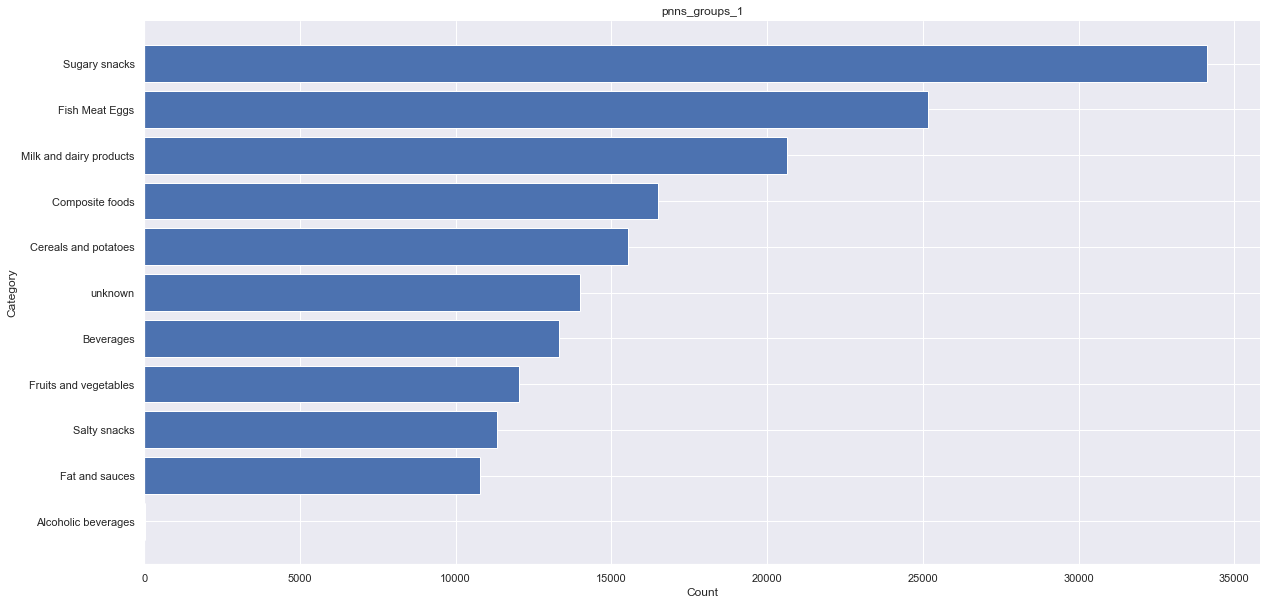

In [206]:
categorical_columns = data_f.select_dtypes(include = ['category']).columns
for col in categorical_columns:
    plt.figure(figsize=(20,10))   
    plt.barh(width=data_f.groupby(col).count().reset_index()['product_name'].sort_values(), y = data_f.groupby(col)['product_name'].count().reset_index().sort_values(by = 'product_name')[col])
    plt.title(col)
    plt.xlabel('Count')
    plt.ylabel('Category')
    sns.despine()
    plt.show()

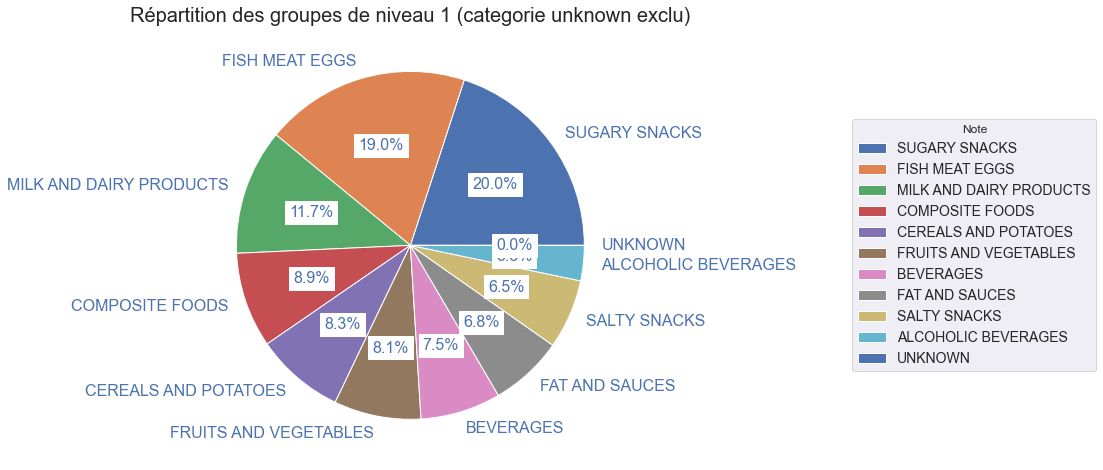

In [135]:
plt.figure(figsize=(8,8))

plt.title('Répartition des groupes de niveau 1 (categorie unknown exclu)', size=20)
wedges, texts, autotexts = plt.pie(data_f[data_f['pnns_groups_1'] != 'unknown'].pnns_groups_1.value_counts().values, 
        labels = data_f[data_f['pnns_groups_1'] != 'unknown'].pnns_groups_1.value_counts().index.str.upper(),
       autopct='%1.1f%%', textprops={'fontsize': 16, 
                                     'color' : 'b', 
                                     'backgroundcolor' : 'w',}
       )

ax = plt.gca()

ax.legend(wedges, data_f[data_f['pnns_groups_1'] != 'unknown'].pnns_groups_1.value_counts().index.str.upper(),
          title="Note",
          loc="center left",
          fontsize=14,
          bbox_to_anchor=(1.5, 0, 0.5, 1))

La majeur partie des aliments n'a pas de groupe (unknown). Derrière les sucreries constituent le plus grand groupe d'aliments (Sugary snacks - sweets).
Les boissons (alcooliques ou pas) comptent parmi les groupes d'aliments les moins représentés.

In [207]:
data_f.dtypes

code                             object
product_name                     object
brands                           object
pnns_groups_1                  category
energy-kcal_100g                float64
carbohydrates_100g              float64
sugars_100g                     float64
fat_100g                        float64
proteins_100g                   float64
salt_100g                       float64
nutrition-score-fr_100g         float64
nutrition-score-fr_100g_cat        int8
dtype: object

#### Variables string

Cherchons les mots les plus présents dans les variables product_name et brands

In [137]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
stop_words = set(stopwords.words('french'))
stop_words.add('-')
stop_words.add('&')
stop_words.add('2')
stop_words.add('3')
stop_words.add('4')
stop_words.add('5')
stop_words.add('6')
stop_words.add('a')

def generate_wordcloud(text): 
    plt.figure( figsize=(20,10) )
    wordcloud = WordCloud(relative_scaling = 0.1,
                          stopwords = stop_words
                          ).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

    
def plotMostFrequentWord(dict_frequence_mots, colonne):
    df_mots_indicateurs_populaires = pd.DataFrame(dict_frequence_mots, columns = ['Mot', 'Occurences']).sort_values(by='Occurences', ascending=False)
    sns.set(style="whitegrid")
    plt.figure(figsize=(16, 8))
    sns.barplot(y = 'Mot', x='Occurences', data = df_mots_indicateurs_populaires)
    titre = '40 mots les plus récurrents dans la colonne ' + colonne
    plt.title(titre, size=20)
    plt.show()

def showMostFrequentWord(data_f):    
    colonnes = ['product_name', 'brands' ]
    for col in colonnes:
        liste_mots = []
        for categorie in data_f[col].unique():
            if isinstance(categorie, str):
                mots_dans_categorie = categorie.split(' ')
                for i in range(len(mots_dans_categorie)):
                    liste_mots.append(mots_dans_categorie[i])
        liste_mots_filtres = [w for w in liste_mots  if not w.lower() in stop_words]
        dict_frequence_mots = Counter(liste_mots_filtres).most_common(40)
        generate_wordcloud("".join(liste_mots_filtres))
        plotMostFrequentWord(dict_frequence_mots, col)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nordine\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


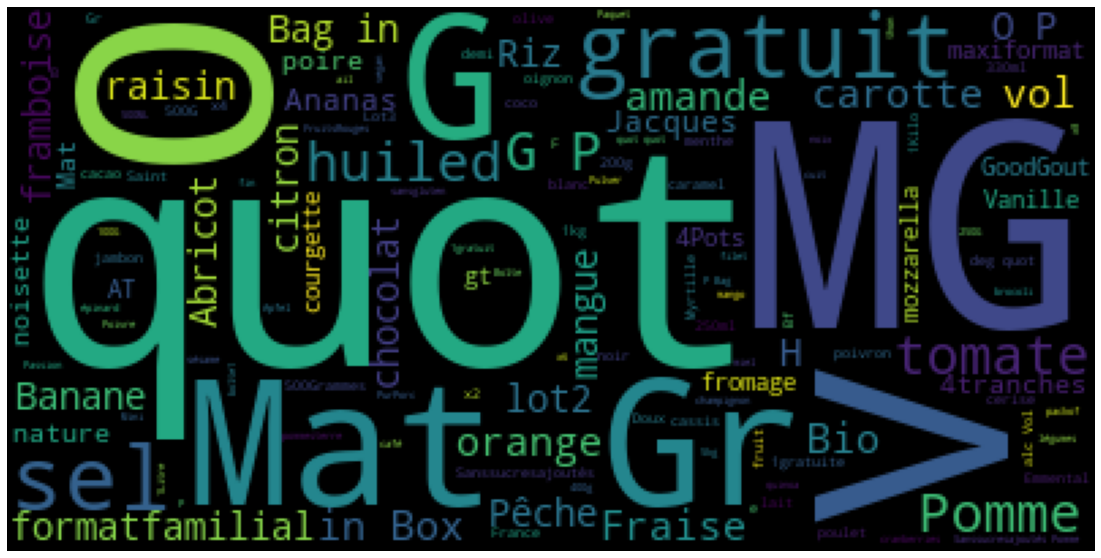

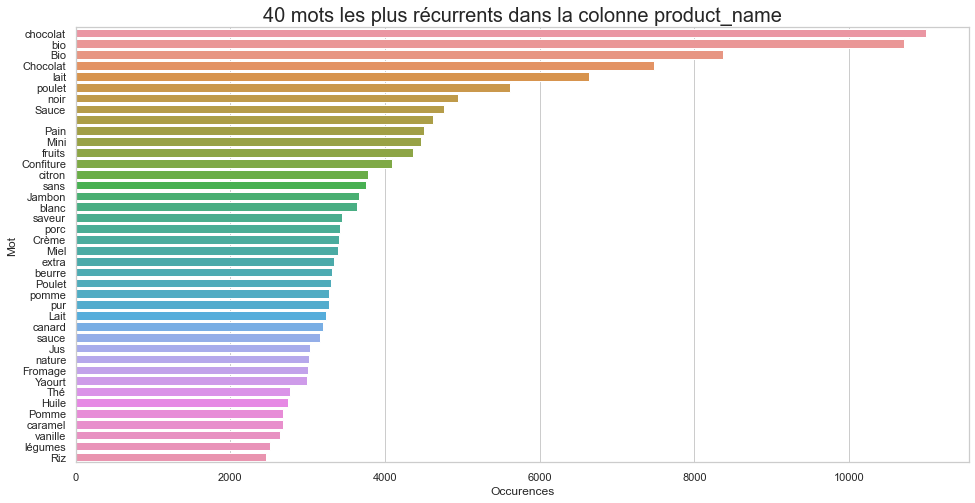

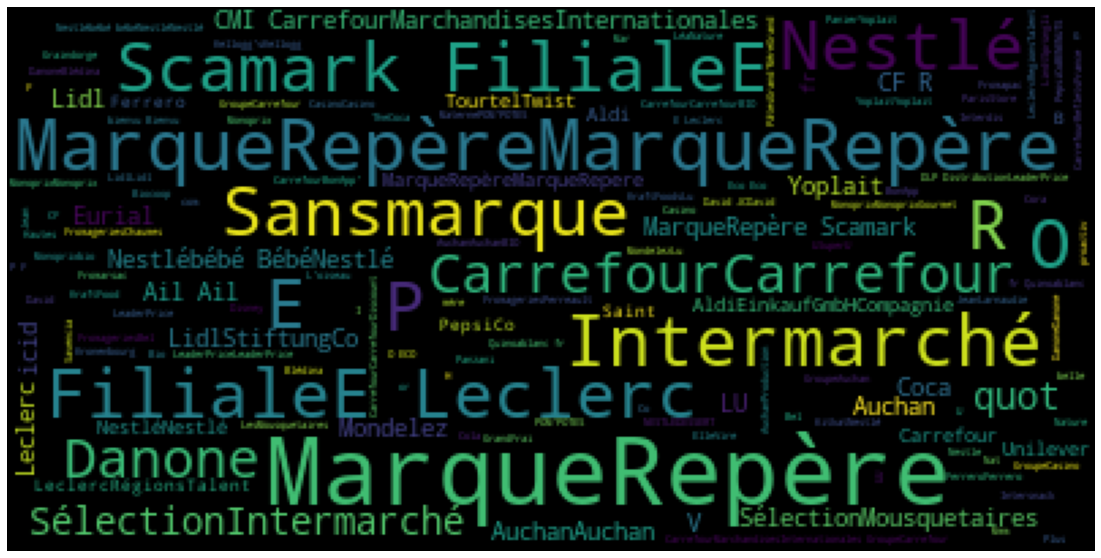

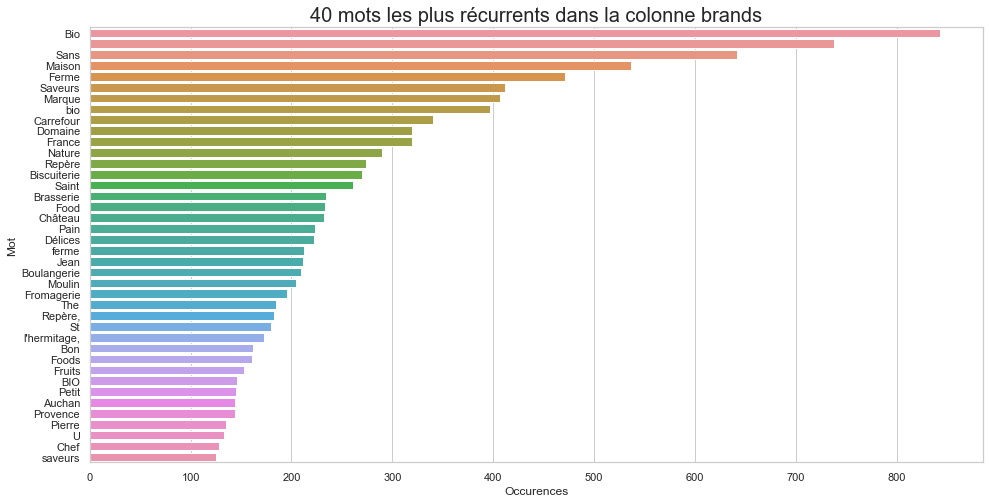

In [58]:
showMostFrequentWord(data_f)

In [138]:
data_f[numeric_columns].describe()

,energy-kcal_100g,carbohydrates_100g,sugars_100g,fat_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
count,523472.000000,541722.000000,545240.000000,541858.000000,543444.000000,526661.000000,250623.000000
mean,273.199087,26.462973,13.493784,14.194965,9.008327,1.243414,9.402262
std,187.392727,27.478408,19.935229,17.366472,9.950493,4.165537,8.739948
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,113.000000,2.300000,0.600000,1.000000,1.500000,0.065000,2.000000
50%,261.000000,13.200000,3.200000,8.000000,6.300000,0.560000,10.000000
75%,398.000000,51.000000,19.000000,22.100000,13.000000,1.310000,16.000000
max,900.000000,100.000000,100.000000,100.000000,99.700000,100.000000,40.000000


## Analyse Bivariée

### Matrice de corrélation

Les variables numériques (xxxx_100g) sont quantitatives continues. Nous allons donc vérifier s'il existe une relation linéaire entre les variables (Pearson).

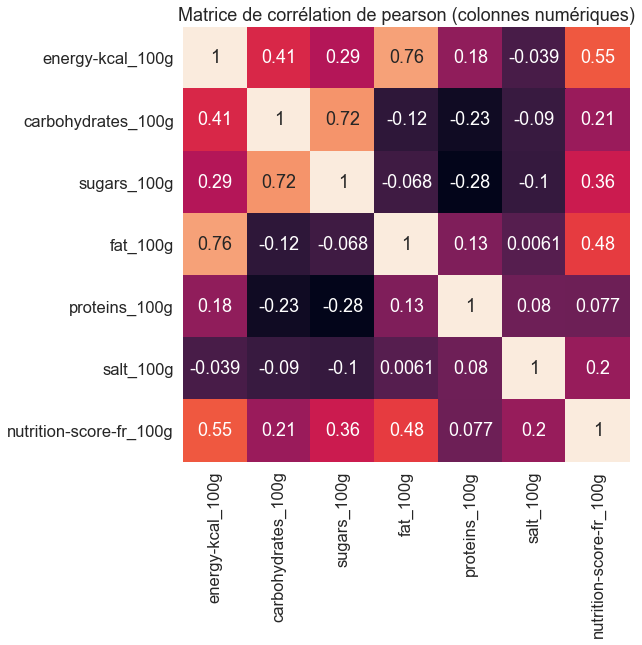

In [139]:
plt.figure(figsize=(8,8))
sns.set(font_scale=1.5)
plt.title('Matrice de corrélation de pearson (colonnes numériques)')

corr = data_f[numeric_columns].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True 

ax = sns.heatmap(corr, annot=True, cbar=False)
plt.show()
sns.set(font_scale=1)

On constate, sans surprise, que le taux de lipide (fat_100g) est très corrélé au nombre de calories: 0.76. Le taux de glucides 
(carbohydrates_100g) est modérémment corrélé au nombre de calories (0.41), tandis que le nombre de protéines a très peu d'impact sur l'energie pour 100g(0.18). Les aliments à fort taux de protéine ont tendance à contenir moins de glucides (les proteines sont négativement corrélée au taux de glucides). 

Sans surprise non plus, la variable salt_100g n'est corrélé à aucune autre variable et le sucre est très corrélé au taux de glucide.

In [140]:
data_f.columns

Index(['code', 'product_name', 'brands', 'pnns_groups_1', 'pnns_groups_2',
       'energy-kcal_100g', 'carbohydrates_100g', 'sugars_100g', 'fat_100g',
       'proteins_100g', 'salt_100g', 'nutrition-score-fr_100g',
       'nutrition-score-fr_100g_cat'],
      dtype='object')

### Le groupe d'aliment et le score ont-ils un effet sur les variables nutritionnelles?

In [141]:
def show_boxplots(categorical_variable):
    for col in numeric_columns:
        plt.figure(figsize=(10,20))
        sns.boxplot(y = data_f[categorical_variable], 
            x = data_f[col], showmeans=True, 
                meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
        plt.show()

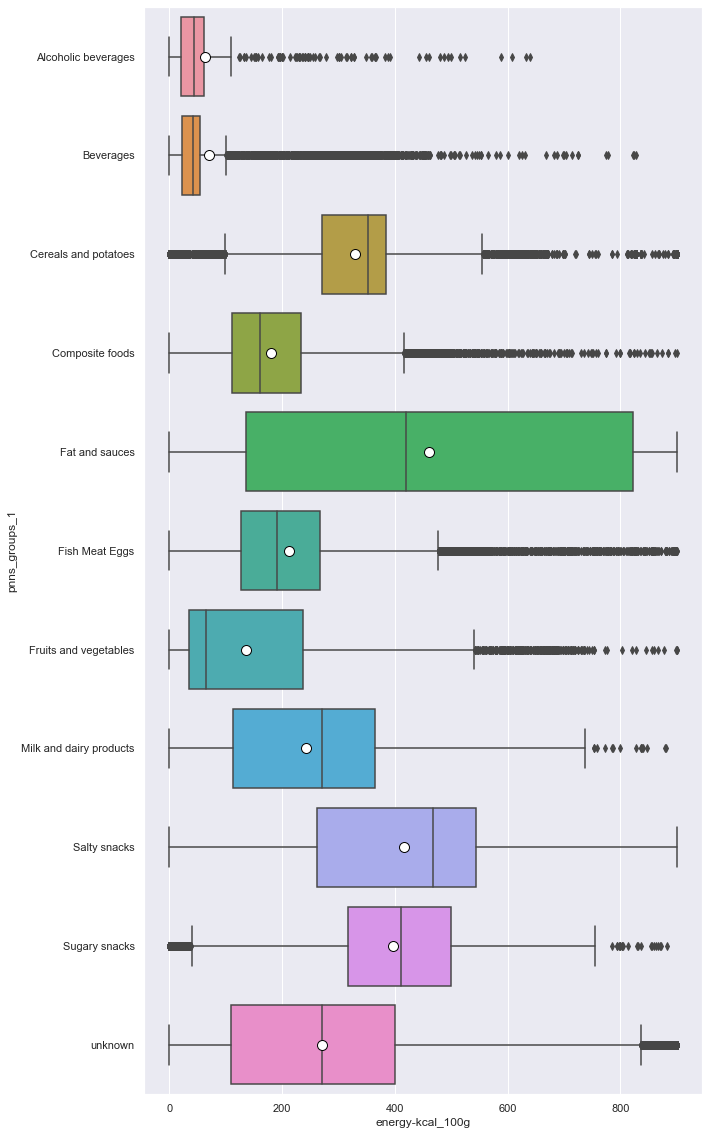

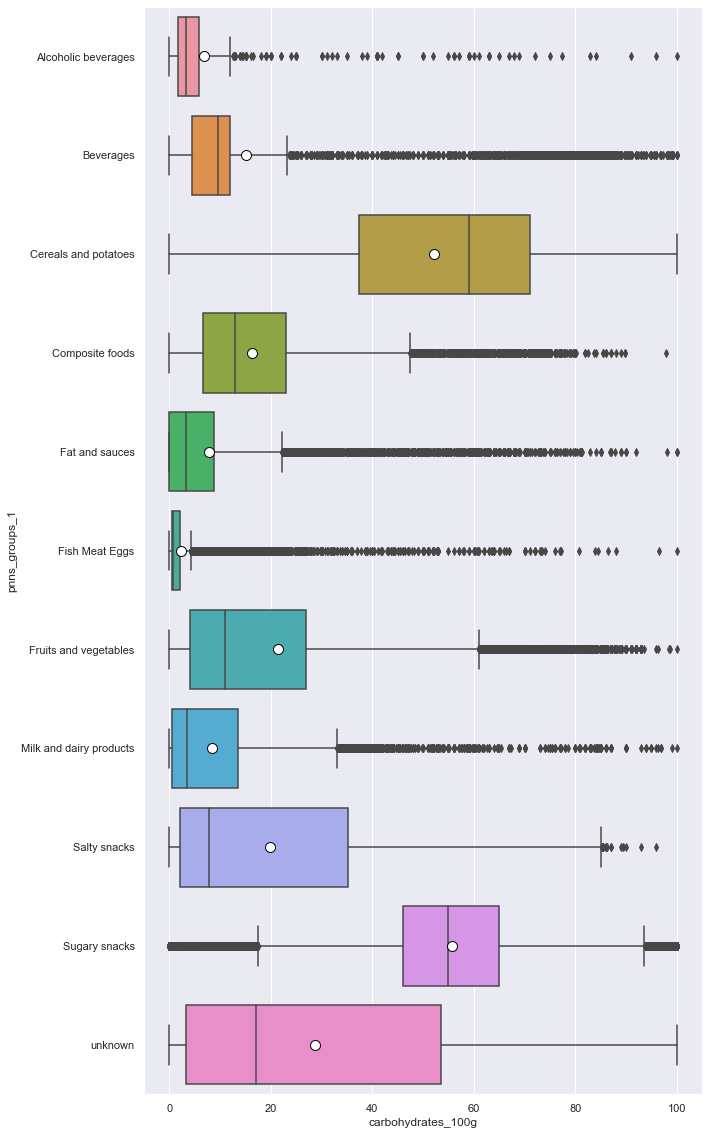

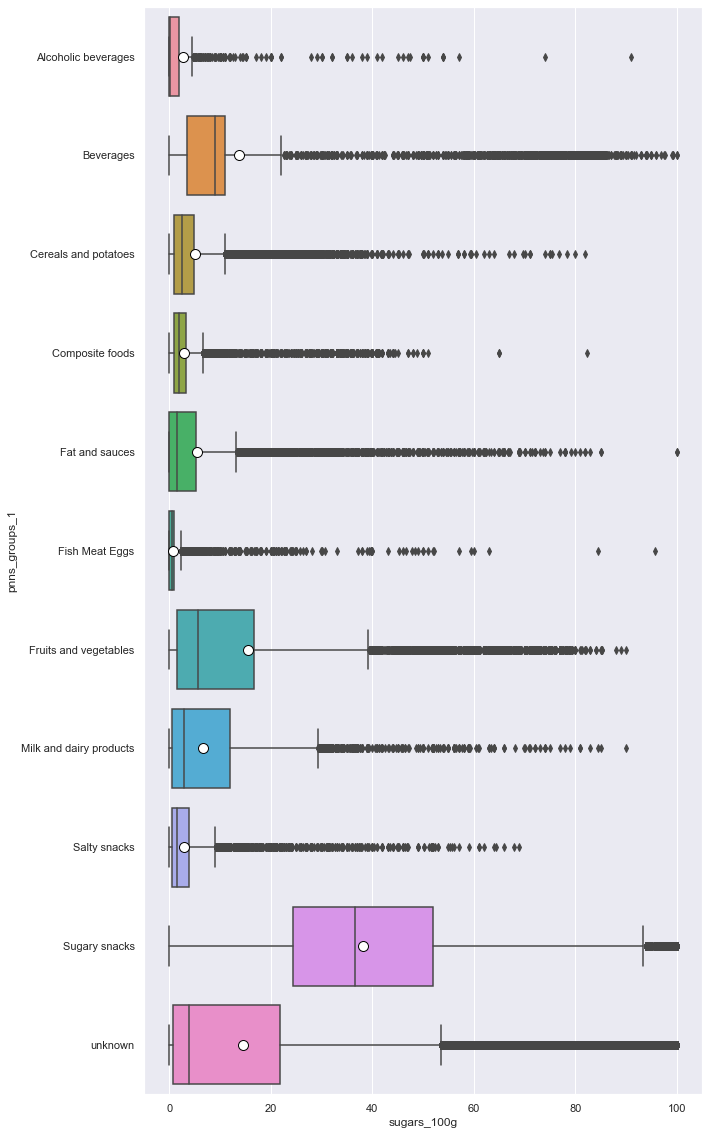

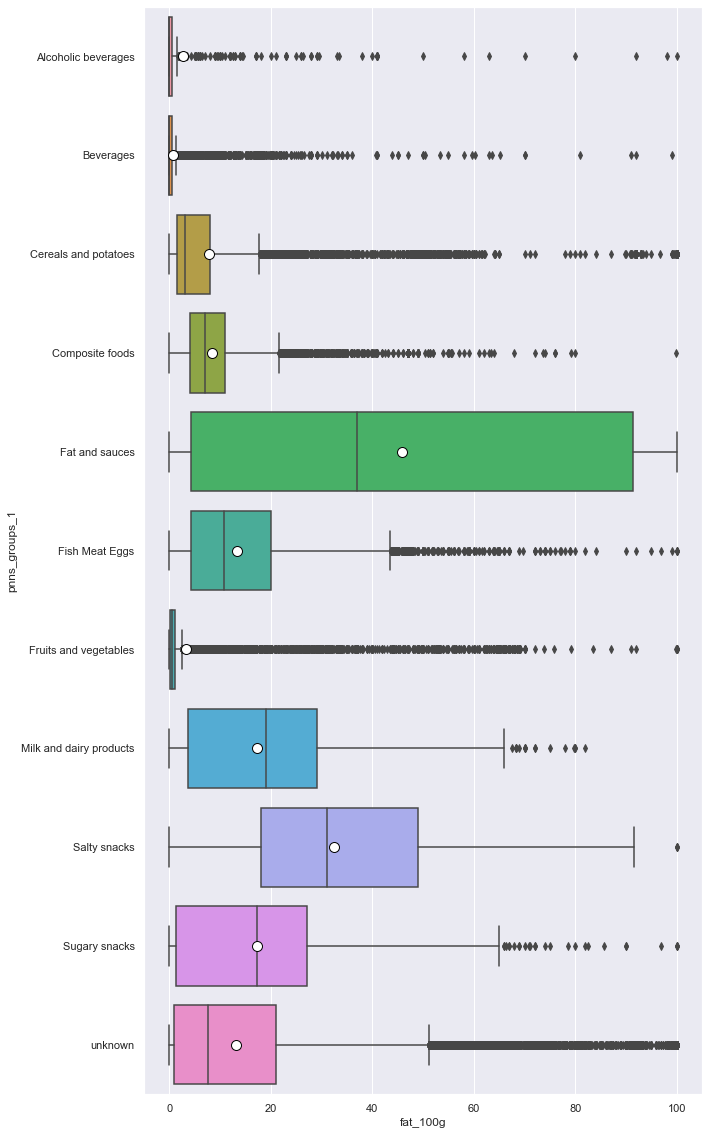

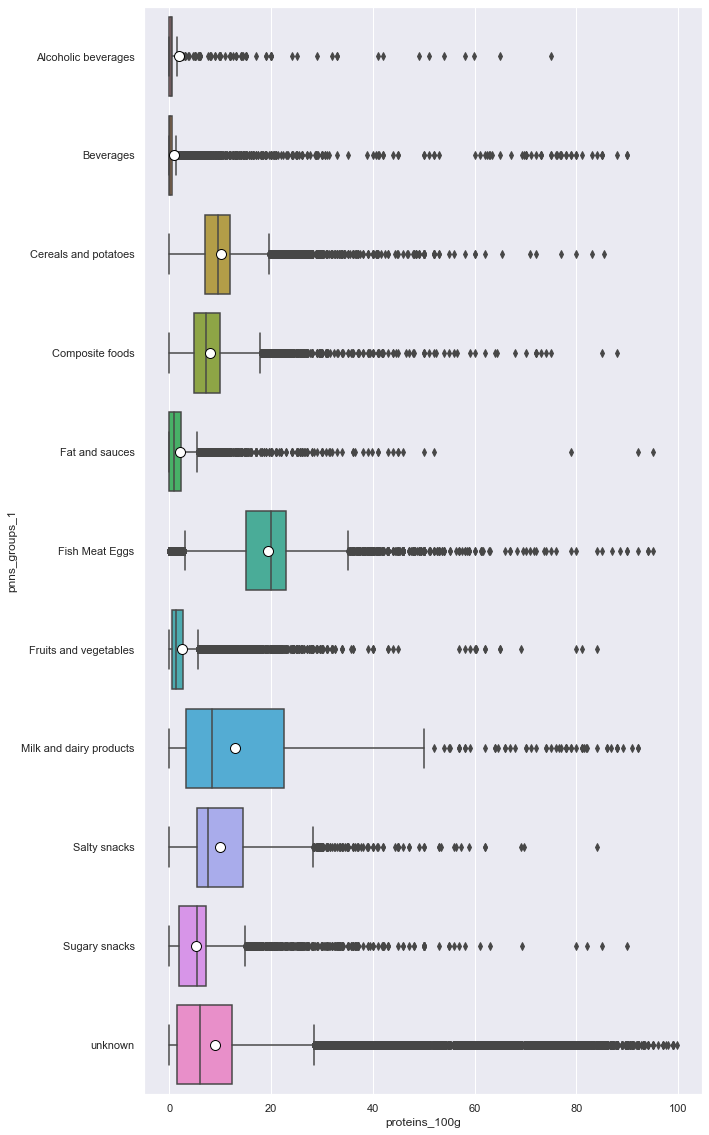

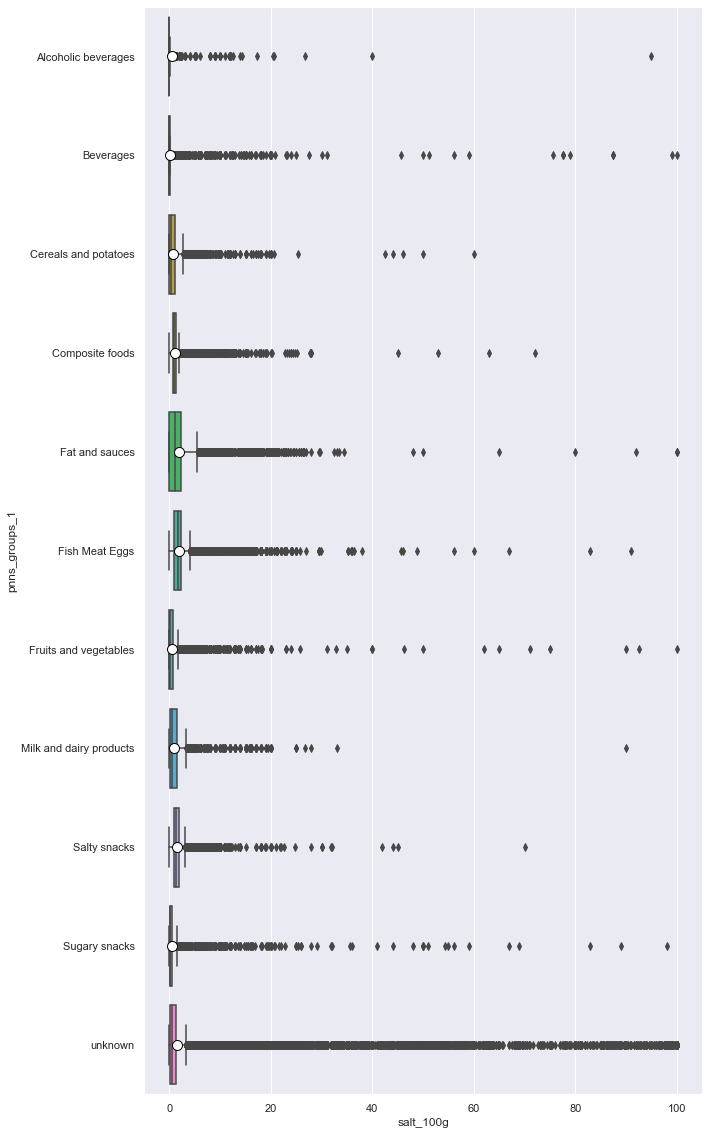

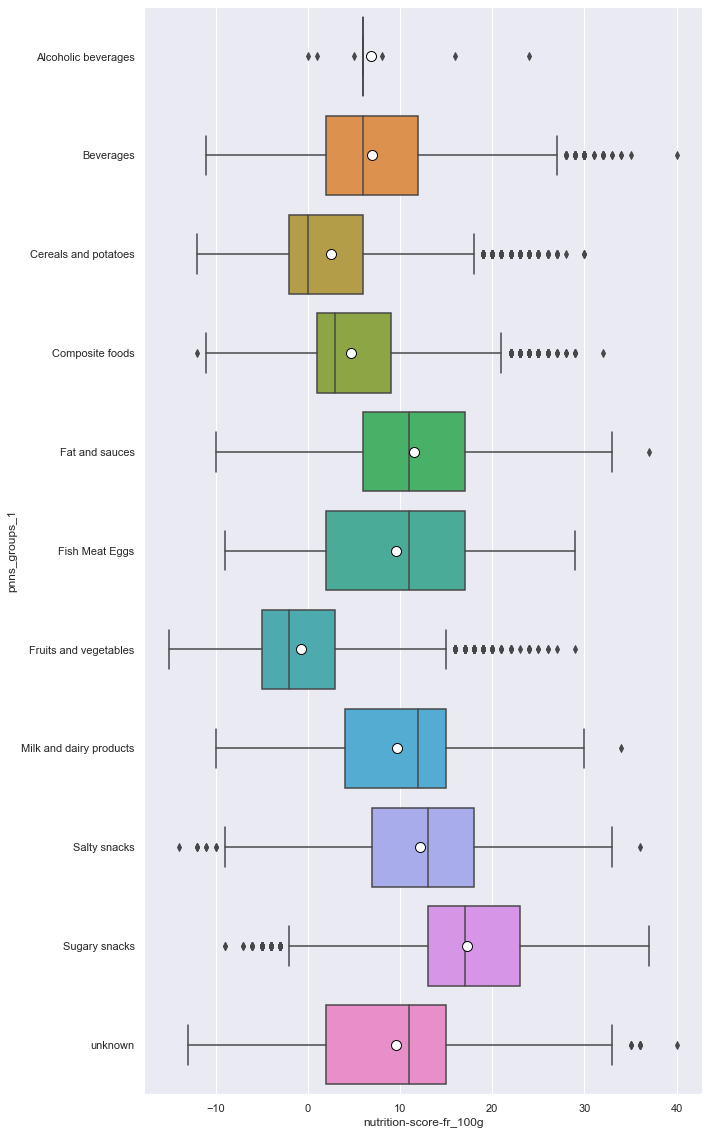

In [142]:
show_boxplots('pnns_groups_1')

In [143]:
data_f['nutrition-score-fr_100g_cat'] = data_f['nutrition-score-fr_100g_cat'].astype('category')

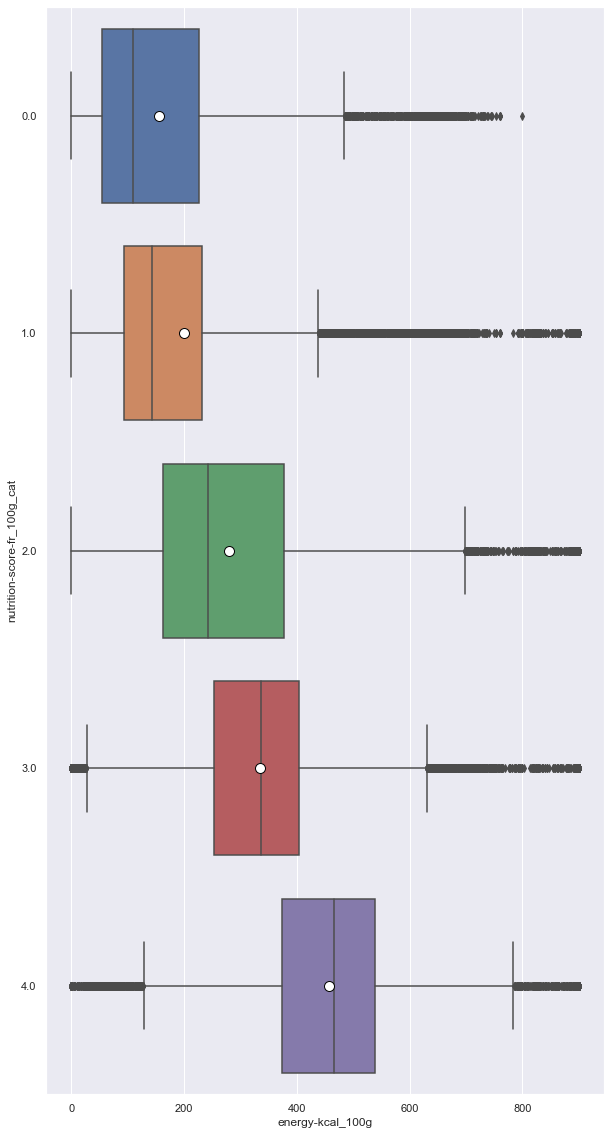

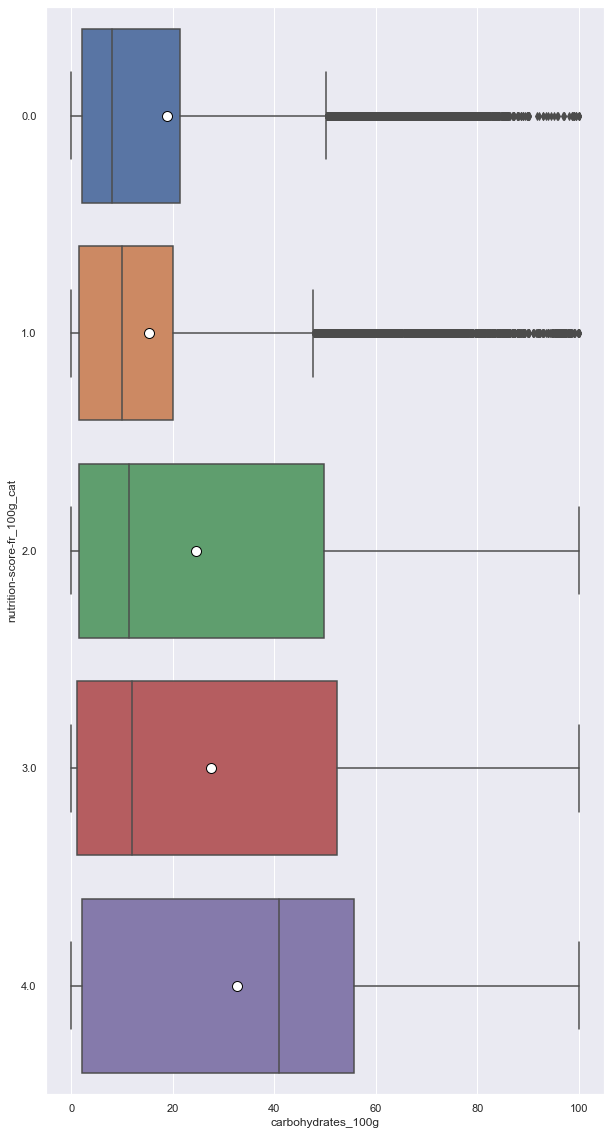

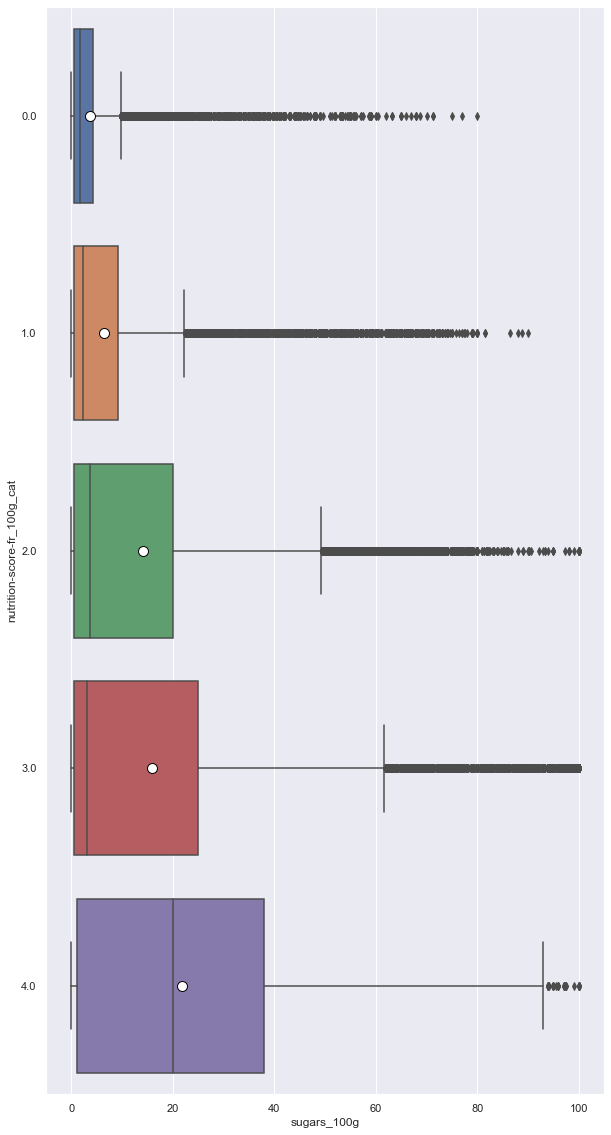

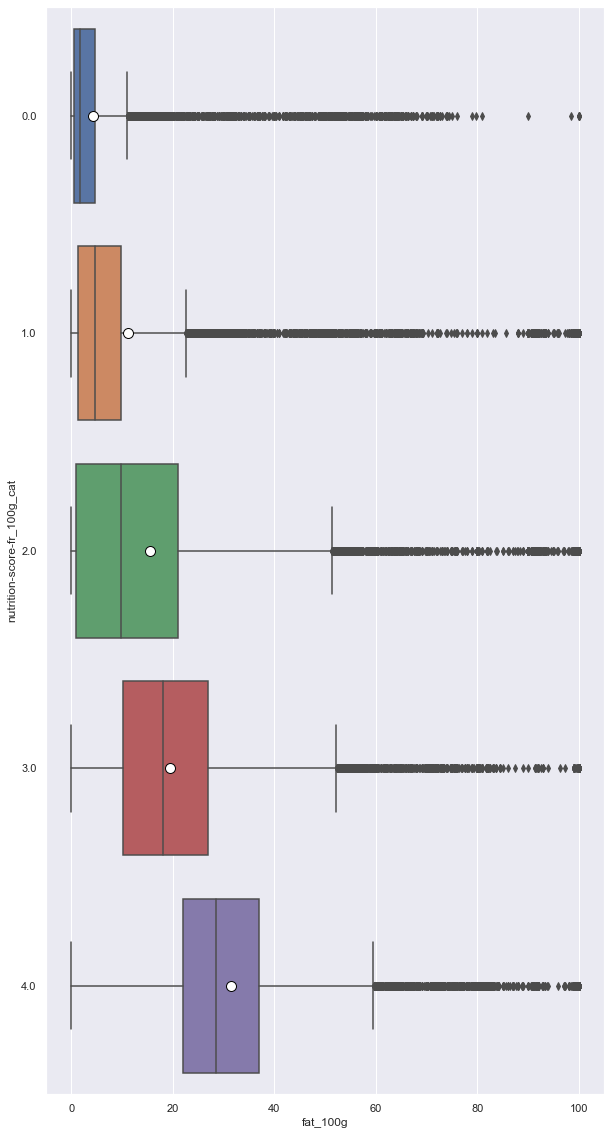

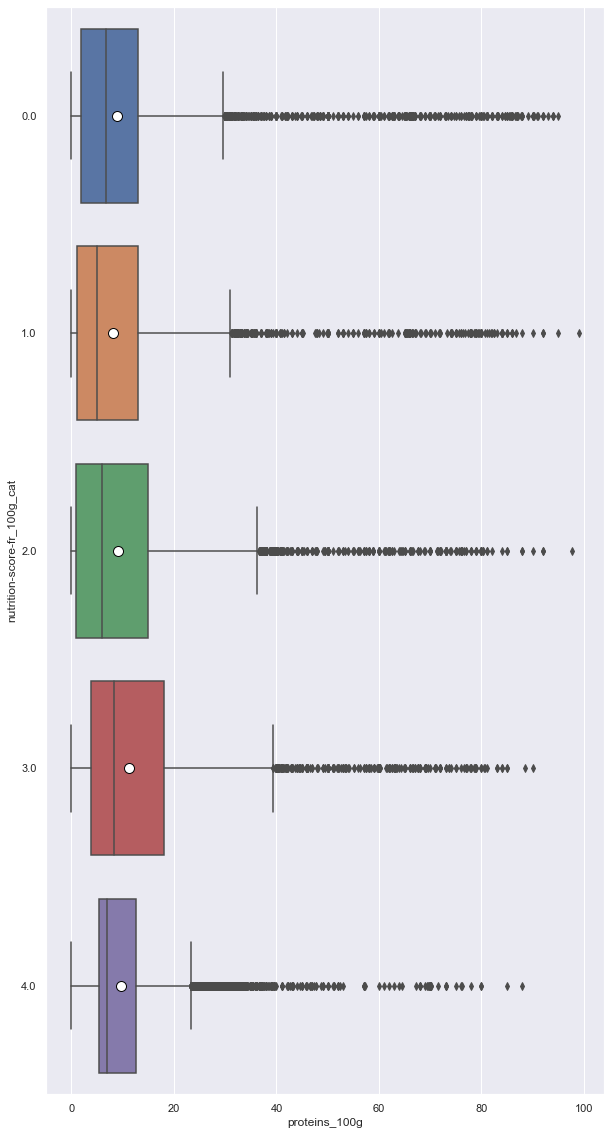

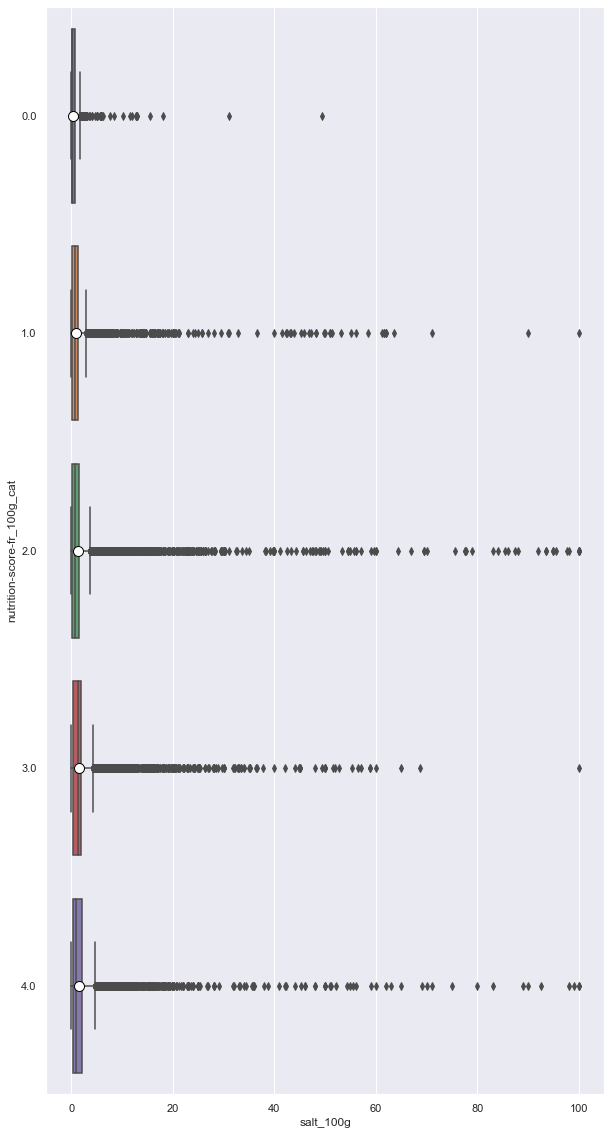

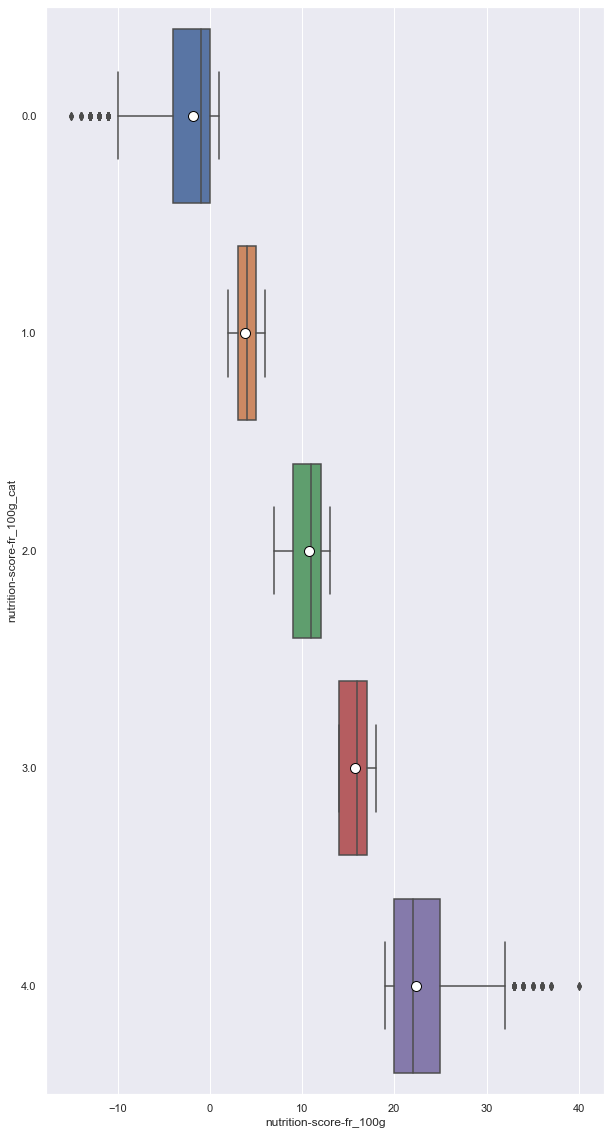

In [167]:
show_boxplots('nutrition-score-fr_100g_cat')

On voit ici que les taux moyens sont très différents d'une catégorie à l'autre à part le sel où les moyennes semblent plus ou moins les mêmes. Par exemple, les calories pour le groupe 'Fat and sauces'. Ceux pour la catégorie 'Cereals and potatoes' sont plus dispersés. Mais vérifions maintenant cette affirmation par un test Anova.

#### Test ANOVA

Vérifions tout d'abord la normalité de nos variables quantitatives.

<Figure size 2880x720 with 0 Axes>

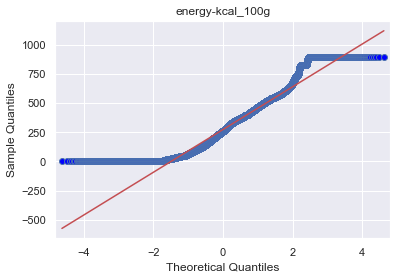

<Figure size 2880x720 with 0 Axes>

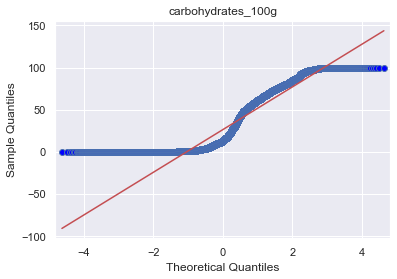

<Figure size 2880x720 with 0 Axes>

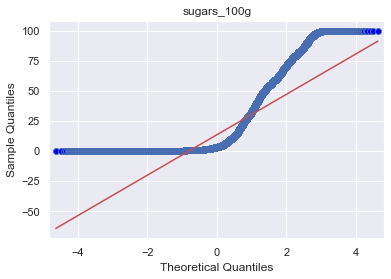

<Figure size 2880x720 with 0 Axes>

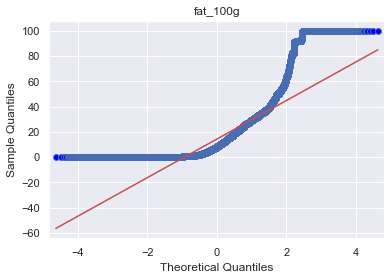

<Figure size 2880x720 with 0 Axes>

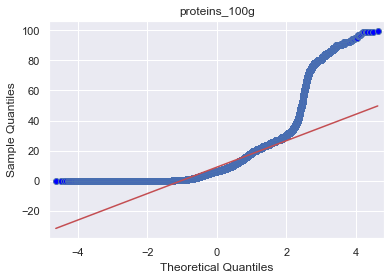

<Figure size 2880x720 with 0 Axes>

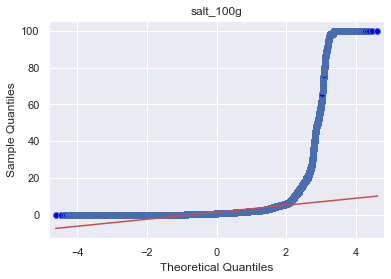

<Figure size 2880x720 with 0 Axes>

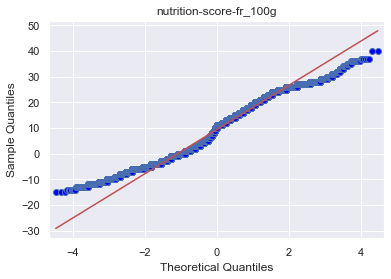

In [169]:
import statsmodels.api as sm
for column in numeric_columns:
    plt.figure(figsize=(40,10))
    sm.qqplot(data_f[column].dropna(),line ='r')
    plt.title(column)
    plt.show()

D'après ces graphiques, les variables ne suivent pas du tout une loi normale. Confirmons ceci avec un test de normalité.

#### Test de normalité d'Agostino & Pearson

In [146]:
from scipy import stats
for column in numeric_columns:
    print('________\n{}'.format(column))
    k2, p = stats.normaltest(data_f[column], 
                             axis=0,
                             nan_policy = 'omit')
    alpha = 5e-2
    print("p = {:g}".format(p))
    print("k2 = {:g}".format(k2))
    if p < alpha:  # null hypothese: x a une distribution normale
        print("H0 est rejetée : {} n'est pas de distribution normale".format(column))
    else:
        print("H0 ne peut être rejetée :{}, on considère l'hypothèse de normalité".format(column))

________
energy-kcal_100g
p = 0
k2 = 23677.4
H0 est rejetée : energy-kcal_100g n'est pas de distribution normale
________
carbohydrates_100g
p = 0
k2 = 80465.8
H0 est rejetée : carbohydrates_100g n'est pas de distribution normale
________
sugars_100g
p = 0
k2 = 176977
H0 est rejetée : sugars_100g n'est pas de distribution normale
________
fat_100g
p = 0
k2 = 238914
H0 est rejetée : fat_100g n'est pas de distribution normale
________
proteins_100g
p = 0
k2 = 313970
H0 est rejetée : proteins_100g n'est pas de distribution normale
________
salt_100g
p = 0
k2 = 1.02318e+06
H0 est rejetée : salt_100g n'est pas de distribution normale
________
nutrition-score-fr_100g
p = 0
k2 = 43089.8
H0 est rejetée : nutrition-score-fr_100g n'est pas de distribution normale


Malheureusement, nous ne pouvons pas appliquer le test d'analyse de la variance car aucune colonne quantitative n'est normale.
Cela dit, le test ANOVA reste assez robuste du fait qu'il se base sur des moyennes. D’après le Théorème Central Limite, même si des données individuelles ne suivent pas une loi normale, une moyenne issue de ces données suivra, elle, une loi normale, à condition que l’échantillon collecté soit suffisamment grand.

In [147]:
data_f['pnns_groups_1'].dropna().unique().tolist()

['unknown',
 'Fat and sauces',
 'Composite foods',
 'Sugary snacks',
 'Fruits and vegetables',
 'Fish Meat Eggs',
 'Beverages',
 'Milk and dairy products',
 'Cereals and potatoes',
 'Salty snacks',
 'Alcoholic beverages']

In [148]:
X1 = 'pnns_groups_1' 
X2 = 'nutrition-score-fr_100g_cat'

def eta_squared(x,y, column):
    print()
    moyenne_y = y.mean()
    classes = []
    a = x.unique().tolist()    
    for classe in a:
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    anova_score = SCE/SCT
    print(f'{column:-<50}{anova_score}')
    


In [149]:
for col in numeric_columns:
    eta_squared(data_f[X1].dropna(), data_f[col].dropna(), col)


energy-kcal_100g----------------------------------0.17158474916439437

carbohydrates_100g--------------------------------0.2614655791415998

sugars_100g---------------------------------------0.2151993942230576

fat_100g------------------------------------------0.19615414534531955

proteins_100g-------------------------------------0.16747113007138179

salt_100g-----------------------------------------0.012456041857736265

nutrition-score-fr_100g---------------------------0.3331984175904768


In [123]:
#data_f[X2].dropna()[data_f['salt_100g'].dropna() == 3.0]

La statistique ANOVA pondère les moyennes par l'effectif de la classe. Ce qui explique que la corrélation entre les variables nutritionnelles et le groupe d'aliment est moins prononcé. Il semble plus elevé pour les carbohydrates.
La statistique pour le sel confirme ce que l'on a vu précédemment avec les boxplot.

### Le score dépend il du groupe d'aliments?

#### Test du chi2

In [217]:
X = "pnns_groups_1"
Y = "nutrition-score-fr_100g"

tableau_contingence = pd.crosstab(data_f[~data_f[Y].isna()][X], data_f[~data_f[Y].isna()][Y])
tableau_contingence

nutrition-score-fr_100g,-15.0,-14.0,-13.0,-12.0,-11.0,-10.0,-9.0,-8.0,-7.0,-6.0,-5.0,-4.0,-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,40.0
pnns_groups_1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alcoholic beverages,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,13,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Beverages,0,0,0,0,0,6,2,11,5,25,53,137,90,151,171,1122,1180,1051,668,966,746,811,449,456,508,557,517,536,657,435,588,253,229,157,119,453,41,40,17,27,10,16,9,7,13,24,3,8,2,2,1,0,0,1
Cereals and potatoes,0,0,0,3,11,9,20,49,184,1062,744,1245,906,933,2075,1483,824,624,617,492,336,285,296,262,259,272,458,363,313,303,249,239,192,148,102,55,45,29,20,16,9,5,2,1,0,2,0,0,0,0,0,0,0,0
Composite foods,0,0,0,1,1,3,3,19,39,106,191,316,478,705,1089,1511,1896,1844,1561,1184,819,359,219,112,183,259,676,630,478,380,272,257,286,165,99,94,81,54,42,54,25,10,2,1,3,0,0,0,0,0,0,0,0,0
Fat and sauces,0,0,0,0,0,1,1,6,10,43,59,75,106,111,128,130,138,213,217,232,457,1176,454,228,254,408,1136,690,451,384,401,399,325,332,693,508,206,183,89,64,74,140,150,57,47,1,0,0,1,0,0,0,1,0
Fish Meat Eggs,0,0,0,0,0,0,1,6,3,5,135,1350,458,525,1265,1193,1001,1281,1949,1617,1492,41,48,25,33,85,1419,1275,1284,1156,705,771,703,910,872,821,639,370,285,540,673,213,6,2,1,0,0,0,0,0,0,0,0,0
Fruits and vegetables,2,7,26,68,122,203,263,349,479,757,1281,1389,1370,833,583,536,598,705,549,326,299,185,278,213,192,114,62,51,54,24,27,26,11,23,10,12,1,4,0,4,1,2,0,0,1,0,0,0,0,0,0,0,0,0
Milk and dairy products,0,0,0,0,0,1,0,2,1,3,82,137,145,342,606,1116,839,1221,1438,1051,829,729,497,361,373,408,1042,964,1908,1713,1477,1055,939,618,515,131,42,27,13,7,6,6,4,2,0,1,0,0,0,1,0,0,0,0
Salty snacks,0,1,0,3,2,2,10,23,2,10,42,92,93,129,129,180,303,326,351,334,350,324,314,329,520,578,582,558,624,665,477,493,400,392,415,688,898,285,150,94,45,72,20,13,8,0,1,0,2,0,0,1,0,0


In [211]:
#tableau_contingence = pd.crosstab(data_f[X].dropna(), data_f[Y].dropna())
from scipy.stats import chi2_contingency
H0 = 'Les variables sont probablement indépendants'
H1 = 'Les variables ne sont probablement pas indépendants'
seuil = 0.05
stat, p_value, dof, expected = chi2_contingency(tableau_contingence)
print("stat = {:g}".format(stat))
print("p_value = {:g}".format(p_value))

if p_value < seuil:
    print(H1)
else:
    print(H0)

stat = 128719
p_value = 0
Les variables ne sont probablement pas indépendants


Ce résultat semble cohérent car certains groupes ont l'air plus sain sur le plan diététique que d'autres (Ex: Sugary Snacks vs Fruit and vegetables)

## Justification de l'idée d'application

Idées : 
* Identifier les caractéristiques nutritionnelles des produits par groupe d'aliments ou par code.
* **Calcul automatique de nutriscore**

Le nutriscore semble être corrélé au groupe d'aliments et sur les variables nutritionnelles (en dehors du sel).
Nous pouvons donc trouver un modèle qui, à partir des variables nutritives (hors sel) et du groupe d'aliments, calcule automatiquement le nutriscore.

In [172]:
def encodage(df, col):
    code = {}
    i = 0
    for value in df[col].unique():
        code[value] = i
        i += 1
    df[col] = df[col].map(code)
    return df, code

In [173]:
encodage(data_f, 'pnns_groups_1')

(                   code                  product_name         brands  \
 0         0000000000017              Vitória crackers            NaN   
 1         0000000000031                         Cacao            NaN   
 2         0000000000100   moutarde au moût de raisin   courte paille   
 3         0000000000123         Sauce Sweety chili 0%            NaN   
 4         0000000000178                     Mini coco            NaN   
 ...                 ...                           ...            ...   
 679931    9999992756112                   Steak haché            NaN   
 679932         99999988                        Boules            NaN   
 679933    9999999004360                Minis beignets            NaN   
 679934         99999995                    Faux filet            NaN   
 679935  999999999999999             Signal Toothpaste            NaN   
 
        pnns_groups_1         pnns_groups_2  energy-kcal_100g  \
 0                  0               unknown             3

In [175]:
data_f['pnns_groups_1'].unique()

[0, 1, 2, 3, 4, ..., 7, 8, 9, 10, NaN]
Length: 12
Categories (11, int64): [0, 1, 2, 3, ..., 7, 8, 9, 10]

In [187]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#X = data_f.dropna()[[ 'energy-kcal_100g', 'carbohydrates_100g', 'sugars_100g', 'fat_100g', 'proteins_100g']]
X = data_f.dropna()[['pnns_groups_1', 'energy-kcal_100g', 'carbohydrates_100g', 'sugars_100g', 'fat_100g', 'proteins_100g']]
y = data_f.dropna()['nutrition-score-fr_100g']



scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [186]:
lr = LinearRegression().fit(X_train, y_train)
print('R² sur jeu d\'entraînement : ', lr.score(X_train,y_train))
print('R² sur jeu de test', lr.score(X_test,y_test))
print('Poids de chaque variable dans la régression', lr.coef_)
print('ordonnée à l\'origine', lr.intercept_)


R² sur jeu d'entraînement :  0.4572569044968571
R² sur jeu de test 0.4573738986689041
Poids de chaque variable dans la régression [ 1.490407   -0.89003292  4.33843245  3.24285891  1.05636042]
ordonnée à l'origine 9.043902276067973


On a un coefficient R² de 0,46 pour le jeu de test ce qui est un résultat plutôt mauvais.

La régression ne colle pas au jeu de données. Essayons l'algorithme RandomForest.  

In [188]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.model_selection import learning_curve
from sklearn.metrics import r2_score

In [189]:
def evaluation(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(r2_score(y_test, y_pred))  
    
    N, train_score, val_score = learning_curve(model, X_train, y_train, cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1,1,10))
    plt.figure()
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='test score')
    plt.legend()
    return val_score.mean(axis=1)

In [192]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': range(50),
    'verbose' : [1]
}

rfr = GridSearchCV(RandomForestRegressor(), params, cv = 5)

In [193]:
rfr.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    9.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    7.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    7.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    8.9s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    8.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    8.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    8.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   12.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   12.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   12.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   15.1s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:   16.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:   15.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:   15.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:   12.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:   12.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:   12.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:   12.7s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   22.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   20.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   16.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:   22.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:   21.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:   18.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   19.4s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   22.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   21.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   20.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Us

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': range(0, 50), 'verbose': [1]})

In [194]:
print('Meilleur estimateur: ', rfr.best_estimator_)
print('score sur jeu d\'entraînement : ', rfr.best_estimator_.score(X_train,y_train))
print('score sur jeu de test', rfr.best_estimator_.score(X_test,y_test))


Meilleur estimateur:  RandomForestRegressor(n_estimators=49, verbose=1)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


score sur jeu d'entraînement :  0.970260101758315
score sur jeu de test 0.8540185359086947


[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    0.8s finished


Il y a un petit surapprentissage qui peut être corrigé:
* en ne retenant que les meilleurs features (SelectKBest)
* jouer sur d'autres paramètres (max depth, min_samples_leaf, max_features...) via GridSearchCV
* tester d'autres algorithmes de machine learning (AdaBoostClassifier,KNeighborsClassifier....)